reference: [ROBERT KWIATKOWSKI](https://www.kaggle.com/datark1/detailed-eda-understanding-h-m-data)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_customer = pd.read_csv('h-and-m-personalized-fashion-recommendations/customers.csv')
df_customer['customer_id'] =\
    df_customer['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')


df_customer

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,6883939031699146327,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,-7200416642310594310,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,-6846340800584936,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,-94071612138601410,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,-283965518499174310,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,7551062398649767985,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,-9141402131989464905,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,-8286316756823862684,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,2551401172826382186,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [2]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  int64  
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ MB


# FN and Active

In [3]:
df_cust_backup = df_customer.copy()

df_customer[['FN','Active']] = df_customer[['FN','Active']].fillna(0)

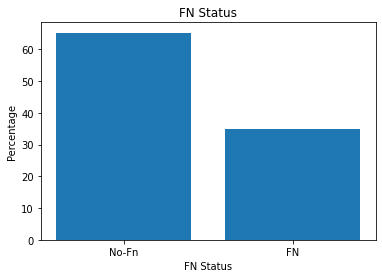

In [4]:
labels = 'No-Fn', 'FN'
sizes = df_customer['FN'].value_counts()
total_sizes = sum(df_customer['FN'].value_counts())
sizes_percentage = sizes / total_sizes * 100

fig, ax = plt.subplots()

ax.bar(labels, sizes_percentage)

ax.set_ylabel('Percentage')

ax.set_xlabel('FN Status')

ax.set_title('FN Status')

plt.show()

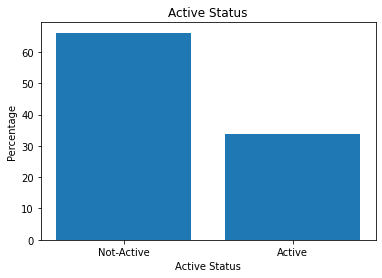

In [5]:
labels = 'Not-Active', 'Active'
sizes = df_customer['Active'].value_counts()
total_sizes = sum(df_customer['Active'].value_counts())
sizes_percentage = sizes / total_sizes * 100

fig, ax = plt.subplots()

ax.bar(labels, sizes_percentage)

ax.set_ylabel('Percentage')

ax.set_xlabel('Active Status')

ax.set_title('Active Status')

plt.show()

# Club Member Status

In [6]:
df_customer['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [7]:
df_customer[['club_member_status']] = df_customer[['club_member_status']].fillna('N/A')

ACTIVE        1272491
PRE-CREATE      92960
N/A              6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

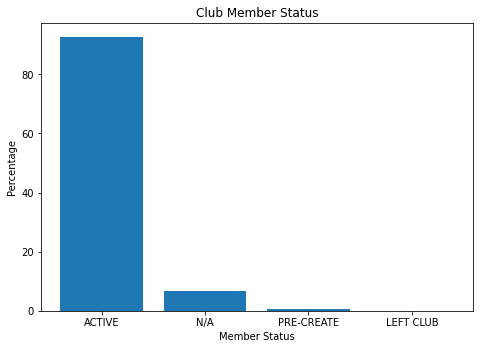

In [8]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sizes = df_customer['club_member_status'].value_counts()
total_sizes = sum(df_customer['club_member_status'].value_counts())
sizes_percentage = sizes / total_sizes * 100
status = df_customer['club_member_status'].unique()

ax.bar(status, sizes_percentage)

ax.set_ylabel('Percentage')

ax.set_xlabel('Member Status')

ax.set_title('Club Member Status')

sizes

# Fashion News Frequency

In [9]:
df_customer['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [10]:
# Cleaning up data NONE = None and nan = None
df_customer[['fashion_news_frequency']] = df_customer[['fashion_news_frequency']].fillna('None')
df_customer['fashion_news_frequency'] = df_customer['fashion_news_frequency'].replace('NONE', 'None')

df_customer['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

None         893722
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64

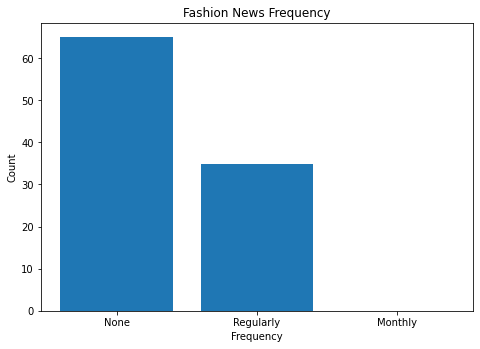

In [11]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sizes = df_customer['fashion_news_frequency'].value_counts()
total_sizes = sum(df_customer['fashion_news_frequency'].value_counts())
sizes_percentage = sizes / total_sizes * 100
frequency = df_customer['fashion_news_frequency'].unique()

ax.bar(frequency, sizes_percentage)

ax.set_ylabel('Count')

ax.set_xlabel('Frequency')

ax.set_title('Fashion News Frequency')

sizes

# Age

In [12]:
df_customer['age'].unique()

array([49., 25., 24., 54., 52., nan, 20., 32., 29., 31., 56., 75., 41.,
       27., 30., 48., 35., 22., 40., 38., 45., 68., 55., 19., 60., 44.,
       21., 26., 28., 53., 33., 17., 23., 51., 18., 34., 57., 47., 70.,
       50., 63., 58., 43., 67., 72., 42., 39., 79., 71., 59., 36., 62.,
       37., 46., 73., 64., 74., 61., 85., 69., 76., 66., 65., 82., 16.,
       90., 80., 78., 81., 84., 77., 97., 89., 83., 98., 88., 86., 87.,
       93., 91., 99., 96., 94., 92., 95.])

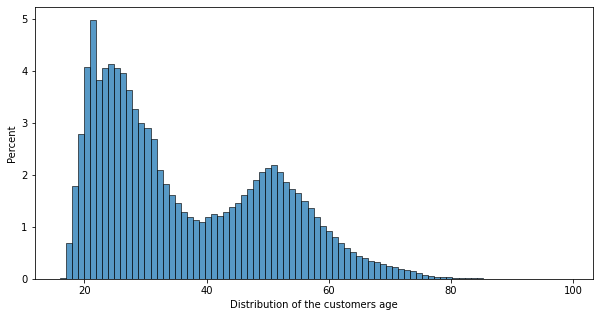

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customer, x='age', bins=df_customer['age'].nunique(), stat="percent")
ax.set_xlabel('Distribution of the customers age')
plt.show()

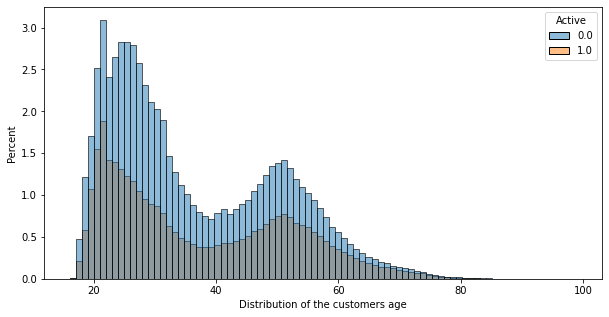

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customer, x='age', bins=df_customer['age'].nunique(), hue='Active', stat="percent")
ax.set_xlabel('Distribution of the customers age')
plt.show()

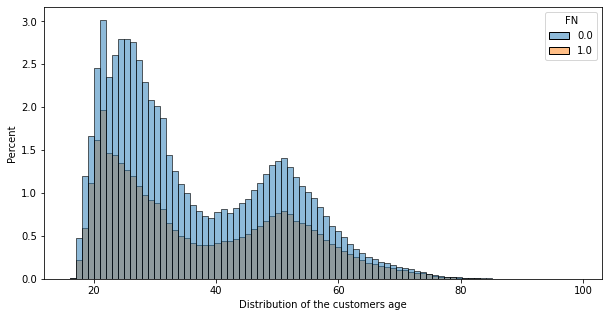

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customer, x='age', bins=df_customer['age'].nunique(), hue='FN', stat="percent")
ax.set_xlabel('Distribution of the customers age')
plt.show()

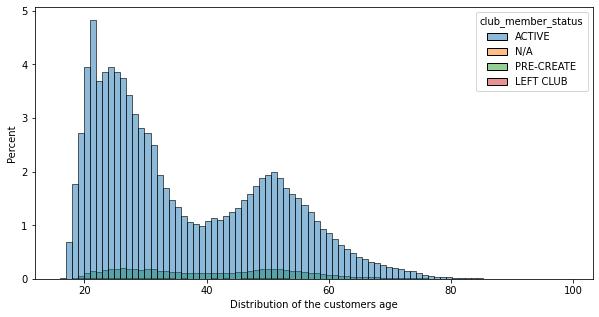

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customer, x='age', bins=df_customer['age'].nunique(), hue='club_member_status', stat="percent")
ax.set_xlabel('Distribution of the customers age')
plt.show()

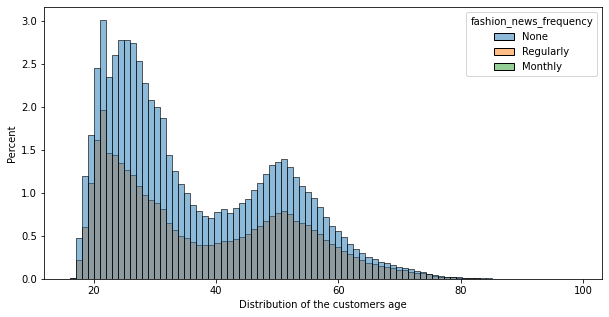

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customer, x='age', bins=df_customer['age'].nunique(), hue='fashion_news_frequency', stat="percent")
ax.set_xlabel('Distribution of the customers age')
plt.show()